### Método dos Mínimos Quadrados

O Método dos Mínimos Quadrados é uma técnica matemática usada para encontrar a melhor equação que representa um conjunto de dados.

Imagine que temos vários pontos em um gráfico — por exemplo, salário vs. gasto no cartão — e queremos desenhar **uma reta que passe o mais próximo possível desses pontos**.

Essa reta é dada por:

$$
\hat{y} = \beta_0 + \beta_1 x
$$

Nosso objetivo é encontrar os coeficientes $\beta_0$ (intercepto) e $\beta_1$ (inclinação) que melhor explicam a relação entre `x` e `y`.


### Por que "mínimos quadrados"?

Porque queremos **minimizar o erro** entre o que o modelo prevê ($\hat{y}$) e o que realmente aconteceu ($y$).

Esse erro é chamado de **resíduo**:
$$
\
\varepsilon_i = y_i - \hat{y}_i
\
$$

Como temos muitos pontos, somamos todos esses erros **elevados ao quadrado** (pra não dar erro negativo anulando positivo):

$$
\
\text{Soma dos quadrados dos erros} = \sum_{i=1}^{n} (y_i - (\beta_0 + \beta_1 x_i))^2
\
$$

O objetivo do método é **minimizar essa soma**.

### Pré-requisitos para o método funcionar bem

Para que o método dos mínimos quadrados funcione da melhor forma possível, precisamos:

- Que os **erros sejam aleatórios e com distribuição normal** (como uma curva em forma de sino).
- Que o modelo seja **linear nos parâmetros** (mesmo que envolva $x^2$, desde que $\beta$ apareça de forma linear).

Se essas condições não forem atendidas, o modelo pode gerar estimativas ruins.

---

### Um pouco de história

O método dos mínimos quadrados foi pensado por **Carl Friedrich Gauss** em 1795, quando ele tinha apenas 18 anos!  
Mas quem publicou primeiro foi **Adrien-Marie Legendre**, em 1805. Gauss publicou suas ideias em 1809.

Mesmo assim, o método às vezes é chamado de "Estimador de Gauss-Markov", por conta do teorema que mostra que, sob certas condições, **esse método é o melhor possível** (não enviesado e com menor variância entre os estimadores lineares).


### Em resumo

- Queremos uma reta que explique nossos dados.
- A reta deve minimizar os erros quadráticos entre os valores reais e os valores previstos.
- Isso é feito resolvendo uma equação baseada na soma dos erros ao quadrado.
- O método é confiável desde que os erros sejam "bonzinhos" (normalmente distribuídos) e o modelo seja linear nos parâmetros.

### Equações

### Equação do Modelo Linear

A equação do modelo linear na forma matricial é:
$$
\
\hat{Y} = X^T \hat{\beta}
\

$$

#### Explicação

- $\hat{Y}$ → vetor com os **valores previstos** (por exemplo, gastos previstos no cartão)
- $X^T$ → **transposta da matriz de entrada** (por exemplo, salário, idade, etc.)
- $\hat{\beta}$ → **vetor de coeficientes** (os parâmetros do modelo, como a inclinação da reta e o intercepto)

Em resumo: essa equação calcula os valores previstos multiplicando os dados de entrada pelos coeficientes do modelo.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# entrada
x = np.array([0, 1, 2, 3, 4, 5])

# Coeficientes do modelo
beta_0 = 2  # Intercepto
beta_1 = 1.5  # Inclinação da reta

# Previsões com base na equação da reta: y = β0 + β1 * x
y_pred = beta_0 + beta_1 * x

# Criando DataFrame para visualização
df = pd.DataFrame({
    'x (entrada)': x,
    'Intercepto (β₀)': beta_0,
    'Previsão (ŷ)': y_pred
})

In [13]:
df

,x (entrada),Intercepto (β₀),Previsão (ŷ)
0,0,2,2.0
1,1,2,3.5
2,2,2,5.0
3,3,2,6.5
4,4,2,8.0
5,5,2,9.5


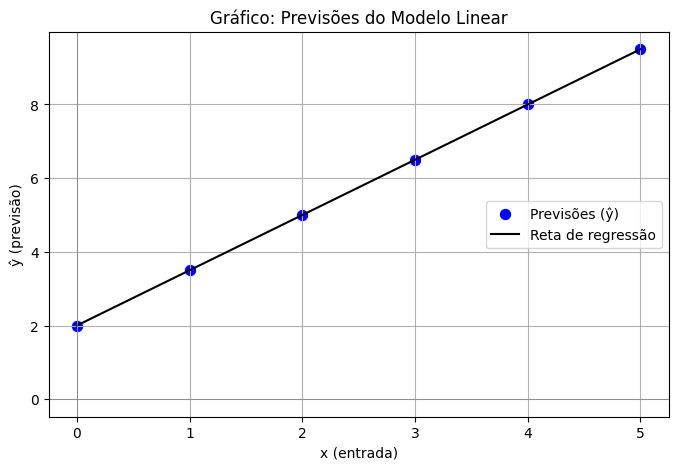

In [14]:
# figure
plt.figure(figsize=(8, 5))

# points
sns.scatterplot(x=x, y=y_pred, color='blue', s=80, label='Previsões (ŷ)')

# linear reg
plt.plot(x, y_pred, color='black', label='Reta de regressão')

# elements
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)

# details
plt.xlabel('x (entrada)')
plt.ylabel('ŷ (previsão)')
plt.title('Gráfico: Previsões do Modelo Linear')
plt.legend()
plt.grid(True)
plt.show()

#### Erro Residual

A RSS (Residual Sum of Squares) é a soma de todos os erros ao quadrado entre o valor real e o valor previsto pelo modelo. Quanto menor for esse valor, melhor o modelo ajustou os dados.

#### Equação

A fórmula do erro residual (RSS - Residual Sum of Squares) é:

$$
\
\text{RSS}(\beta) = \sum_{i=1}^{N} \left(y_i - x_i^T \beta \right)^2
\
$$

#### Interpretação:
- $y_i$ → valor real observado
- $x_i^T \beta$ → valor previsto pelo modelo (ou seja, $\hat{y}_i$)
- A diferença entre eles é o **erro** (ou resíduo)
- O RSS é a **soma dos quadrados desses erros**

Se o RSS for pequeno, significa que a reta do modelo está próxima dos dados reais. Quanto maior o RSS, **pior** o modelo se ajusta aos dados.

In [18]:
# entrada
x = np.array([0, 1, 2, 3, 4, 5])

# Coeficientes do modelo
beta_0 = 2
beta_1 = 1.5

# previsoes
y_pred = beta_0 + beta_1 * x

# valores reais com algum "erro" proposital
y_real = np.array([2.2, 3.7, 5.0, 6.1, 7.8, 9.3])

# residuos
residuos = y_real - y_pred

# RSS
RSS = np.sum(residuos**2)
print(f"Residual Sum of Squares (RSS): {RSS:.4f}")

Residual Sum of Squares (RSS): 0.3200


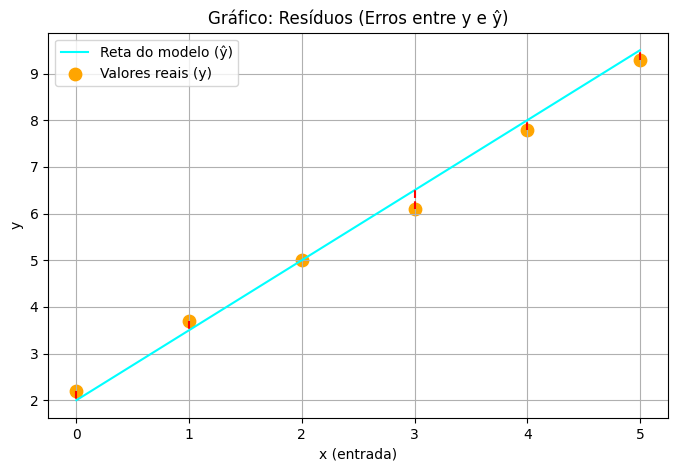

In [19]:
# graphs
plt.figure(figsize=(8, 5))
plt.plot(x, y_pred, label='Reta do modelo (ŷ)', color='cyan')
plt.scatter(x, y_real, label='Valores reais (y)', color='orange', s=80)

for i in range(len(x)):
    plt.plot([x[i], x[i]], [y_real[i], y_pred[i]], color='red', linestyle='--')

plt.xlabel('x (entrada)')
plt.ylabel('y')
plt.title('Gráfico: Resíduos (Erros entre y e ŷ)')
plt.legend()
plt.grid(True)
plt.show()

#### Mínimo da somatória do erro ao quadrado

$$
\
\min \sum (y_i - \hat{y}_i)^2
\
$$

Essa equação representa o objetivo do modelo de regressão linear: encontrar os coeficientes $\beta_0$ e $\beta_1$ que minimizem a soma dos erros ao quadrado entre os valores reais $y_i$ e os previstos $\hat{y}_i$.


In [20]:
# residuo
residuos = y_real - y_pred

# Somatório do erro ao quadrado (função objetivo a ser minimizada)
erro_quadrado_total = np.sum(residuos**2)

print(f"Erro quadrático total (função objetivo): {erro_quadrado_total:.4f}")

Erro quadrático total (função objetivo): 0.3200


In [21]:
# testando várias combinações de beta_0 e beta_1 para encontrar o menor erro
melhor_erro = float('inf')
melhor_b0 = None
melhor_b1 = None

for b0 in np.linspace(0, 4, 50):
    for b1 in np.linspace(1, 2, 50):
        y_hat = b0 + b1 * x
        erro = np.sum((y_real - y_hat) ** 2)

        if erro < melhor_erro:
            melhor_erro = erro
            melhor_b0 = b0
            melhor_b1 = b1

print(f"Melhor combinação encontrada:")
print(f"Intercepto (β₀): {melhor_b0:.3f}")
print(f"Inclinação (β₁): {melhor_b1:.3f}")
print(f"Erro quadrático mínimo: {melhor_erro:.4f}")

Melhor combinação encontrada:
Intercepto (β₀): 2.204
Inclinação (β₁): 1.388
Erro quadrático mínimo: 0.1103
